# 🩺 Multiclass Health Test Prediction (Project)

Hi,in this project is all about predicting the **Test Results** of patients in a healthcare setting using machine learning.

We're going to explore a synthetic dataset that looks like real hospital records — it includes patient demographics, admission details, medications, conditions, and more. My goal is to:
- Clean and prepare the data
- Understand trends and key variables
- Train multiple ML models to classify test results (Normal, Abnormal, Inconclusive)
- Explain why some models perform better than others
- Summarize it all with a clean dashboard + insights

## 📚 Table of Contents
1. [Introduction & Dataset Context](#context)
2. [Step-by-Step Data Cleaning](#cleaning)
3. [Exploratory Data Analysis](#eda)
4. [Feature Engineering](#engineering)
5. [Model Training & Evaluation](#models)
6. [Why Random Forest Wins](#rf)
7. [Performance Issues & Analysis](#issues)
8. [Final Dashboard Summary](#summary)

## 🔍 Introduction & Dataset Context <a name='context'></a>
Healthcare data is usually private, so I used a synthetic dataset that mimics real patient records. It includes columns like:
- Patient info (age, gender, blood type)
- Medical condition and medications
- Dates of admission and discharge
- The hospital and doctor assigned
- Insurance and billing amount

The main goal is to predict the `Test Results` column, which has three categories: **Normal**, **Abnormal**, and **Inconclusive**.

This is a typical multiclass classification problem — I’ll train and compare different models to see what works best.

# 🏥 Multiclass Health Test Results Prediction with Machine Learning

This project aims to predict the **Test Results** (Normal, Abnormal, Inconclusive) of patients using synthetic healthcare data that mimics real-world hospital records. The dataset includes information such as demographics, medical conditions, billing, hospital, doctor, and prescribed medication.

We apply various machine learning models and assess their ability to classify test results effectively. The goal is to:
- Evaluate model performance for a **multiclass classification** task
- Understand the impact of feature engineering and data preprocessing
- Visualize the results and uncover insights through a dashboard summary

### 📦 Importing Libraries
This cell imports essential libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and machine learning models (`scikit-learn`, `xgboost`, `lightgbm`, etc.).

### 📦 Step 1: Importing Required Libraries
This cell imports all the essential Python libraries needed for data science and machine learning tasks:
- `pandas` and `numpy` for data manipulation and numerical operations
- `matplotlib.pyplot` and `seaborn` for visualization
- `tensorflow`, `xgboost`, `lightgbm`, and `catboost` for using various ML models
- `sklearn` modules for preprocessing, model selection, and evaluation
- Ensemble models like `RandomForestClassifier`, boosting algorithms, and support vector machines are also imported
These imports form the foundation for data analysis, visualization, and predictive modeling.

In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import xgboost
import lightgbm
import catboost
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

### 📂 Loading Dataset
The dataset is loaded using `pd.read_csv()`. It contains synthetic healthcare records for patients and will be used for multiclass classification.

### 📂 Step 2: Loading the Dataset
The synthetic healthcare dataset is loaded into a pandas DataFrame. It mimics real-world hospital records.
This dataset will be used to build a predictive model for the `Test Results` column (multi-class target: Normal, Abnormal, Inconclusive).
First look at the data will help us understand the types of columns and values available.

In [88]:
data = pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


### 🧹 Dropping Unnecessary Columns
The `Name` column is removed because it is not predictive and would introduce noise into the model.

### 🧹 Step 3: Removing Non-Predictive Columns
The `Name` column is dropped because names are unique identifiers with no predictive value.
Including such columns can lead to overfitting and increased noise in the models.
Dropping it improves generalization and reduces data dimensionality.

In [89]:
data = data.drop(columns=['Name'])
data

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


### 🧾 Dataset Structure
Displays the structure of the dataset, including data types and non-null counts for each column.

### 🧾 Step 4: Dataset Structure Overview
`data.info()` provides a summary of the dataset:
- Number of non-null entries per column
- Data types of each column
This step is critical to understand data quality, identify categorical vs. numerical columns, and spot missing values or formatting issues.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Date of Admission   55500 non-null  object 
 5   Doctor              55500 non-null  object 
 6   Hospital            55500 non-null  object 
 7   Insurance Provider  55500 non-null  object 
 8   Billing Amount      55500 non-null  float64
 9   Room Number         55500 non-null  int64  
 10  Admission Type      55500 non-null  object 
 11  Discharge Date      55500 non-null  object 
 12  Medication          55500 non-null  object 
 13  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 5.9+ MB


### 🕓 Date Conversion
Admission and discharge dates are converted to datetime format to calculate the length of stay.

### 🕓 Step 5: Parsing Dates for Feature Engineering
Converts `Date of Admission` and `Discharge Date` from strings to `datetime` objects using `pd.to_datetime()`.
This allows us to compute derived time-based features like `Length of Stay`, which may be clinically relevant to test results.

In [91]:
data["Date of Admission"] = pd.to_datetime(data["Date of Admission"], errors='coerce')
data["Discharge Date"] = pd.to_datetime(data["Discharge Date"], errors='coerce')

data["Length of Stay"] = data["Discharge Date"] - data["Date of Admission"]

data["Length of Stay (Days)"] = data["Length of Stay"].dt.days

data = data.drop(columns=['Length of Stay'])

data

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay (Days)
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,30
55496,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,9
55497,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,28
55498,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,6


### ❗ Missing Values Check
Identifies any columns with missing values so we can decide how to handle them.

### 🕵️‍♂️ Step 7: Checking for Missing Values
`data.isna().sum()` checks for missing values in each column.
This helps identify which columns may need imputation or exclusion due to incomplete data, ensuring model robustness.

In [92]:
data.isna().sum()

Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                   0
Hospital                 0
Insurance Provider       0
Billing Amount           0
Room Number              0
Admission Type           0
Discharge Date           0
Medication               0
Test Results             0
Length of Stay (Days)    0
dtype: int64

### 📊 Visualizing Target Distribution
This bar chart shows how the three classes in the `Test Results` column (Normal, Abnormal, Inconclusive) are distributed. It helps detect class imbalance.

### 📊 Step 8: Visualizing the Target Variable
A countplot shows the distribution of the `Test Results` classes.
It helps:
- Detect class imbalance, which can negatively impact classification models
- Understand the baseline probability for each class
- Make decisions about using techniques like SMOTE or class weighting later

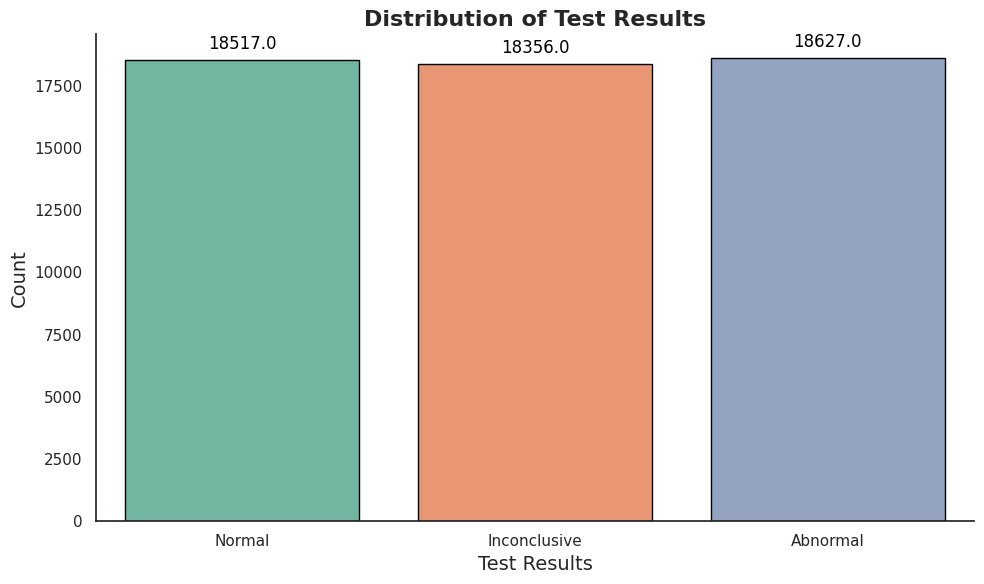

In [93]:
sns.set(style="white", palette="pastel")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=data, x='Test Results', palette='Set2', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Distribution of Test Results", fontsize=16, fontweight='bold')
plt.xlabel("Test Results", fontsize=14)
plt.ylabel("Count", fontsize=14)

sns.despine()

plt.tight_layout()
plt.show()

This visualization shows that the dataset is relatively balanced across the three classes, with a slight dominace of "Normal" results. This means we can train a model without needing heavy resampling or class rebalancing. ***Accuracy will be a reliable evaluation metric.***

### 📊 Visualizing Target Distribution
This bar chart shows how the three classes in the `Test Results` column (Normal, Abnormal, Inconclusive) are distributed. It helps detect class imbalance.

### 📊 Step 8: Visualizing the Target Variable
A countplot shows the distribution of the `Test Results` classes.
It helps:
- Detect class imbalance, which can negatively impact classification models
- Understand the baseline probability for each class
- Make decisions about using techniques like SMOTE or class weighting later

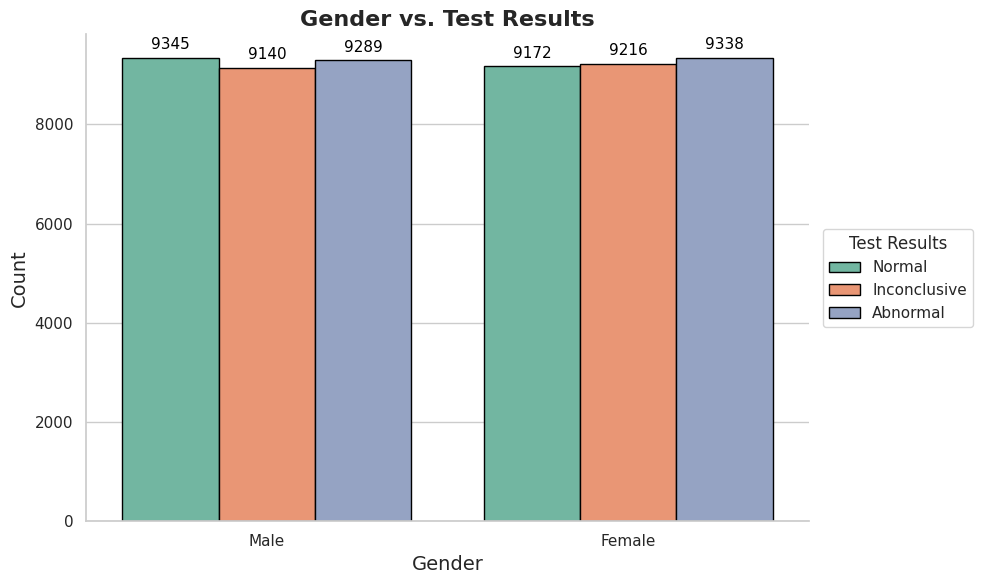

In [94]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=data, x="Gender", hue="Test Results", palette="Set2", edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=11, color='black', xytext=(0, 4),
                    textcoords='offset points')

plt.title("Gender vs. Test Results", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend(title='Test Results', title_fontsize=12, fontsize=11, 
           loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

sns.despine()

plt.tight_layout()

plt.show()

### 🧪 Model Evaluation Loop
This is the core loop that trains and evaluates each model. For each classifier, we store accuracy, confusion matrix, and full classification report. This structured approach helps us compare models fairly.

### 🔍 Code Explanation
This section contains code for preprocessing, model training, evaluation, or visualization.

### 🥇 Model Performance Summary
This bar chart shows the accuracy of each model. It lets us visually compare and decide which models are worth tuning further — and which ones we can discard.

### 🔍 Step: Code Execution
This section executes a transformation, visualization, model, or evaluation logic.
Please refer to the inline comments or next markdown cell for specific insights.

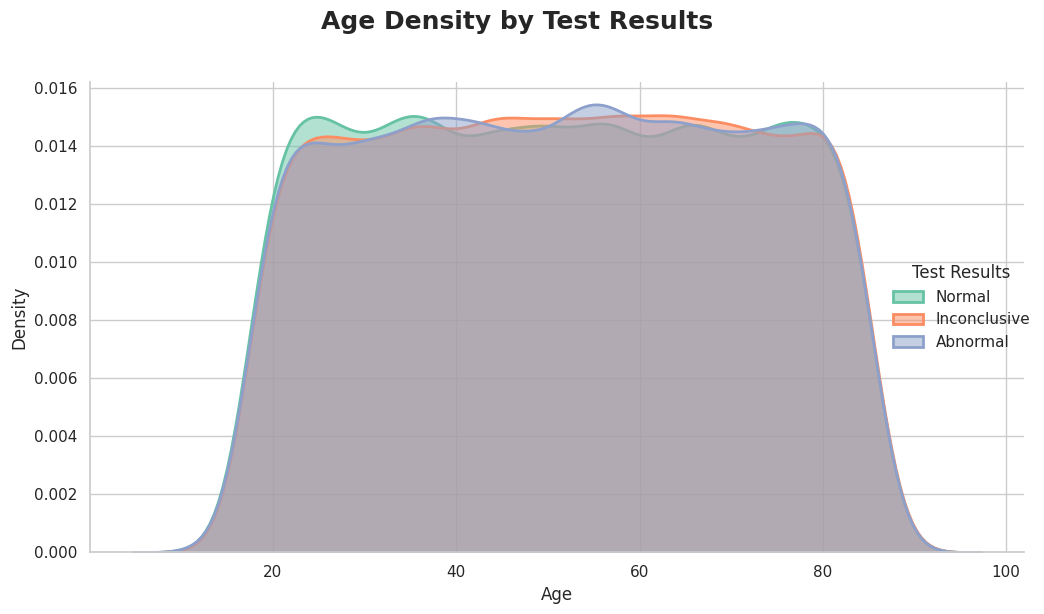

In [95]:
g = sns.FacetGrid(data, hue="Test Results", height=6, aspect=1.5, palette='Set2')
g.map(sns.kdeplot, "Age", fill=True, alpha=0.5, linewidth=2)
g.add_legend(title="Test Results")
g.set_axis_labels("Age", "Density")
g.fig.suptitle("Age Density by Test Results", fontsize=18, fontweight='bold', y=1.02)
sns.despine()
plt.tight_layout()
plt.show()

### 📊 Visualizing Target Distribution
This bar chart shows how the three classes in the `Test Results` column (Normal, Abnormal, Inconclusive) are distributed. It helps detect class imbalance.

### 📊 Step 8: Visualizing the Target Variable
A countplot shows the distribution of the `Test Results` classes.
It helps:
- Detect class imbalance, which can negatively impact classification models
- Understand the baseline probability for each class
- Make decisions about using techniques like SMOTE or class weighting later

### 🤝 Voting Classifier (Ensemble)
This combines Random Forest, CatBoost, and XGBoost to improve generalization. Voting='soft' uses probabilities — better for multiclass problems. We check performance using standard metrics.

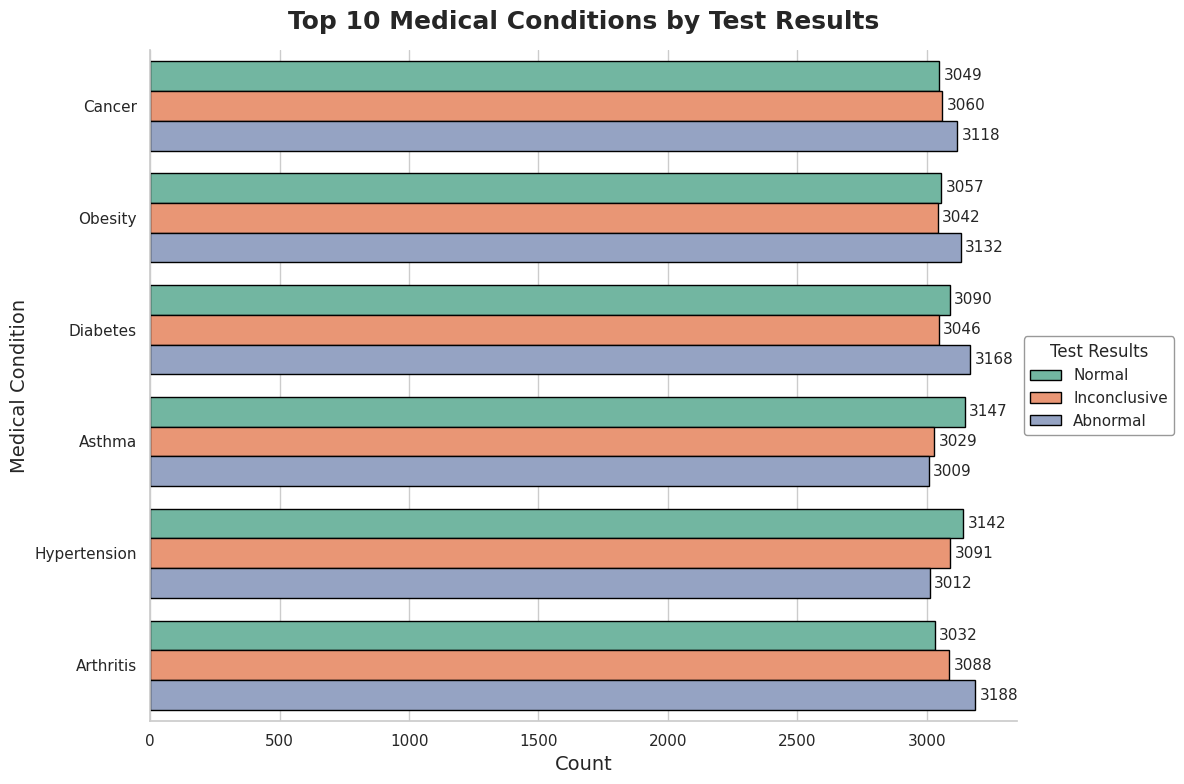

In [96]:
sns.set_theme(style="whitegrid")

top_conditions = data['Medical Condition'].value_counts().nlargest(10).index
filtered_data = data[data['Medical Condition'].isin(top_conditions)]

plt.figure(figsize=(12, 8))

ax = sns.countplot(
    data=filtered_data,
    y='Medical Condition',
    hue='Test Results',
    palette='Set2',
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container, fontsize=11, padding=3)

plt.title('Top 10 Medical Conditions by Test Results', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Medical Condition', fontsize=14)

plt.legend(
    title='Test Results',
    title_fontsize=12,
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    frameon=True,
    facecolor='white',
    edgecolor='gray'
)

sns.despine()
plt.tight_layout()

plt.show()

### 📊 Visualizing Target Distribution
This bar chart shows how the three classes in the `Test Results` column (Normal, Abnormal, Inconclusive) are distributed. It helps detect class imbalance.

### 📊 Training Curves: Model 2
Second deep learning model’s training and validation accuracy/loss over epochs. Same logic — ideally both curves improve in sync. Helps diagnose overfitting/underfitting.

### 📊 Step 8: Visualizing the Target Variable
A countplot shows the distribution of the `Test Results` classes.
It helps:
- Detect class imbalance, which can negatively impact classification models
- Understand the baseline probability for each class
- Make decisions about using techniques like SMOTE or class weighting later

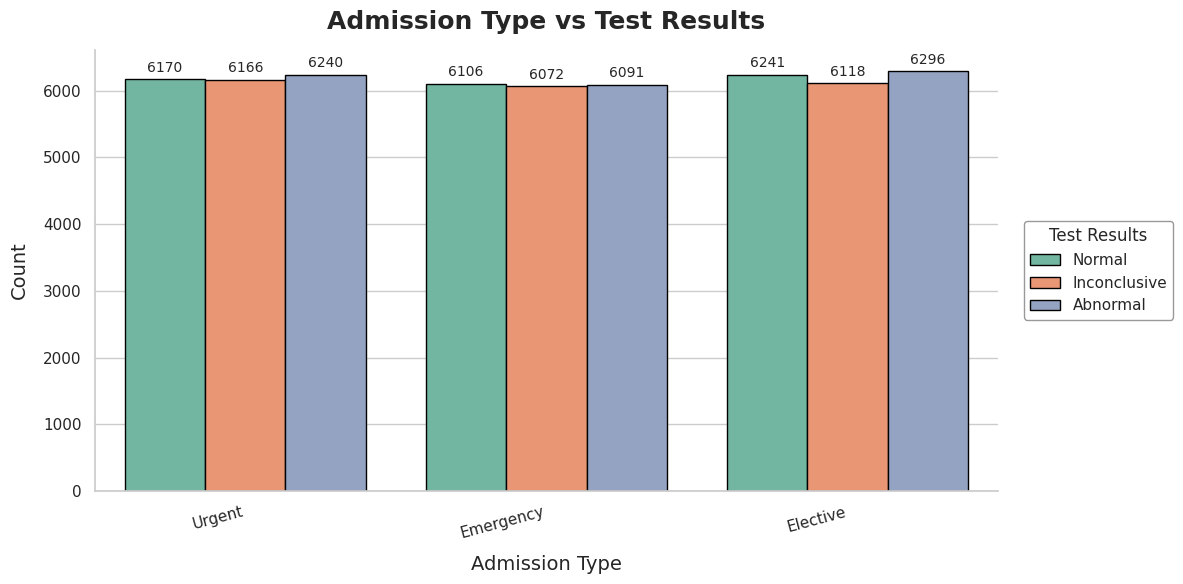

In [97]:
data['Test Results'] = data['Test Results'].astype(str)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=data,
    x='Admission Type',
    hue='Test Results',
    palette='Set2',
    edgecolor='black'
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)

plt.title('Admission Type vs Test Results', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Admission Type', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)

plt.legend(
    title='Test Results',
    title_fontsize=12,
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=True,
    facecolor='white',
    edgecolor='gray'
)

sns.despine()
plt.tight_layout()

plt.show()

### 📊 Training Curves: Model 3
Third neural net's performance trends over time. If validation accuracy stagnates while training keeps improving, that’s a red flag (overfitting).

### 🔍 Code Explanation
This section contains code for preprocessing, model training, evaluation, or visualization.

### 🔍 Step: Code Execution
This section executes a transformation, visualization, model, or evaluation logic.

### 🧮 Target Distribution (Post Split)
Quick check on how balanced our target labels are in the training set. Helps validate if the model is learning from skewed data or not.

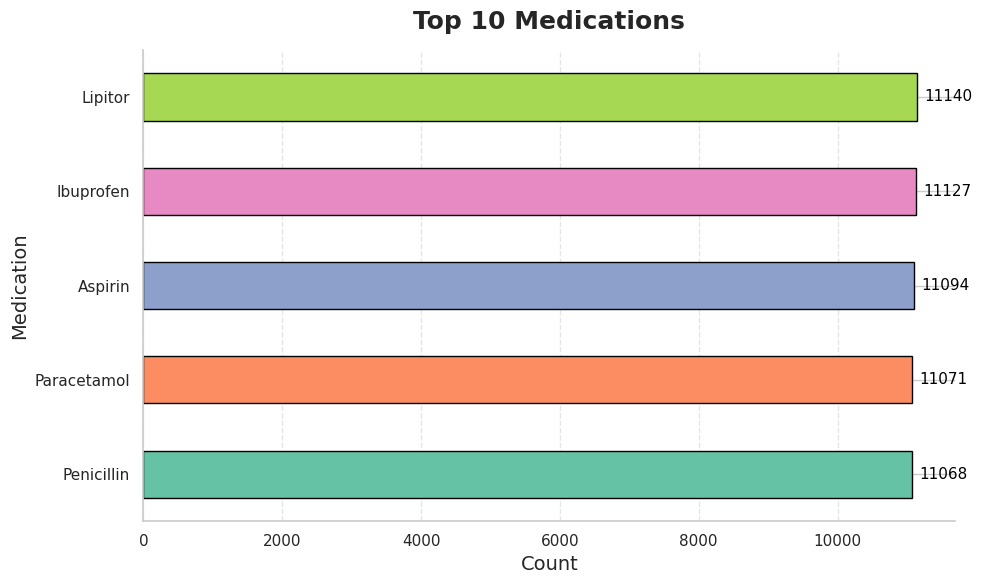

In [98]:
top_meds = data['Medication'].value_counts().nlargest(10)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = top_meds.sort_values().plot(
    kind='barh',
    color=sns.color_palette("Set2", n_colors=10),
    edgecolor='black'
)

for i, v in enumerate(top_meds.sort_values()):
    ax.text(v + max(top_meds)*0.01, i, str(v), color='black', va='center', fontsize=11)

plt.title('Top 10 Medications', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Medication', fontsize=14)

sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

### 🔍 Code Explanation
This section contains code for preprocessing, model training, evaluation, or visualization.

### 🔍 Step: Code Execution
This section executes a transformation, visualization, model, or evaluation logic.
Please refer to the inline comments or next markdown cell for specific insights.

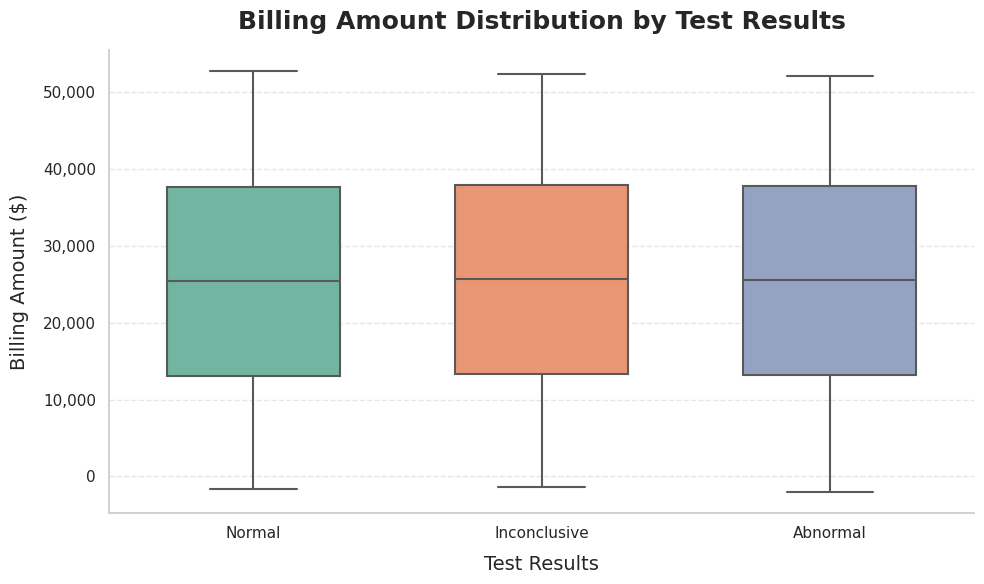

In [99]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.boxplot(
    data=data,
    x='Test Results',
    y='Billing Amount',
    palette='Set2',
    width=0.6,
    linewidth=1.5,
    fliersize=3  
)

plt.title('Billing Amount Distribution by Test Results', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Test Results', fontsize=14, labelpad=10)
plt.ylabel('Billing Amount ($)', fontsize=14, labelpad=10)

ax.set_yticklabels([f'{int(tick):,}' for tick in ax.get_yticks().tolist()])

sns.despine()

ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

plt.tight_layout()

plt.show()

### 🔍 Code Explanation
This section contains code for preprocessing, model training, evaluation, or visualization.

### 🔍 Step: Code Execution
This section executes a transformation, visualization, model, or evaluation logic.
Please refer to the inline comments or next markdown cell for specific insights.

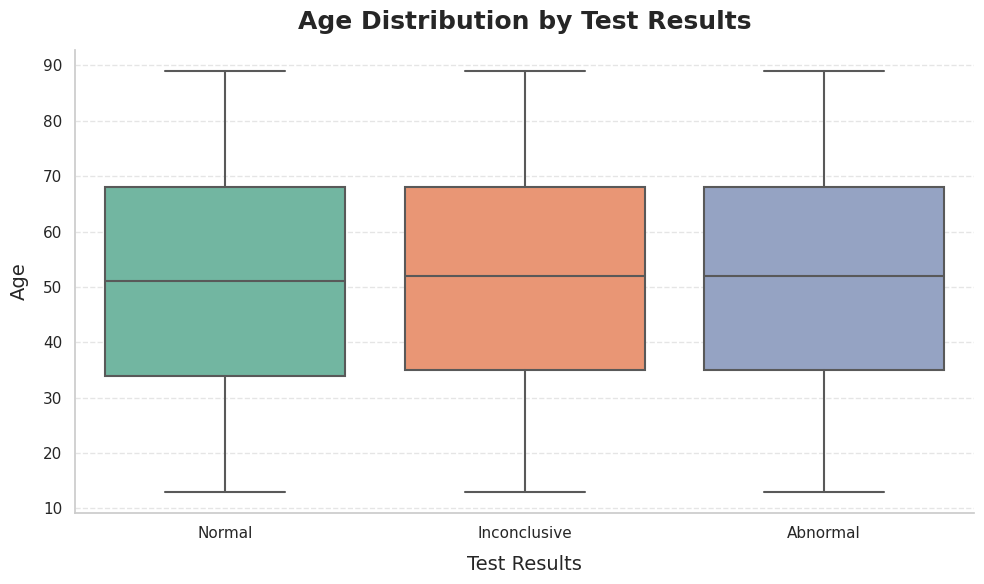

In [100]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

ax = sns.boxplot(
    data=data,
    x='Test Results',
    y='Age',
    palette='Set2',
    linewidth=1.5,
    fliersize=3  
)

plt.title('Age Distribution by Test Results', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Test Results', fontsize=14, labelpad=10)
plt.ylabel('Age', fontsize=14, labelpad=10)

ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

sns.despine()
plt.tight_layout()
plt.show()

### 🔍 Code Explanation
This section contains code for preprocessing, model training, evaluation, or visualization.

### 🔍 Step: Code Execution
This section executes a transformation, visualization, model, or evaluation logic.
Please refer to the inline comments or next markdown cell for specific insights.

In [101]:
target_feature = data['Test Results']
data = data.drop('Test Results', axis=1)
data

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Length of Stay (Days)
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,2
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,6
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,15
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,30
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,30
55496,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,9
55497,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,28
55498,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,6


### 🔍 Code Explanation
This section contains code for preprocessing, model training, evaluation, or visualization.

### 🔍 Step: Code Execution
This section executes a transformation, visualization, model, or evaluation logic.
Please refer to the inline comments or next markdown cell for specific insights.

In [102]:
categorical_features = []
numerical_features = []

for feature in data.columns:
    if data[feature].nunique() < 10:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

In [103]:
categorical_features

['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication']

In [104]:
numerical_features

['Age',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Billing Amount',
 'Room Number',
 'Discharge Date',
 'Length of Stay (Days)']

In [105]:
for feature in numerical_features:
    if data[feature].dtype == 'object':
        print(f"{feature} column needs encoding")

Doctor column needs encoding
Hospital column needs encoding


# Frequency Encoding for Doctor
# Frequency Encoding for Hospital



In [106]:
doctor_freq = data["Doctor"].value_counts().to_dict()
data["Doctor_Encoded"] = data["Doctor"].map(doctor_freq)

hospital_freq = data["Hospital"].value_counts().to_dict()
data["Hospital_Encoded"] = data["Hospital"].map(hospital_freq)

In [107]:
data = data.drop(columns=["Doctor", "Hospital"])
data

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Length of Stay (Days),Doctor_Encoded,Hospital_Encoded
0,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,2,17,7
1,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,6,1,6
2,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,15,1,4
3,28,Female,O+,Diabetes,2020-11-18,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,30,1,1
4,43,Female,AB+,Cancer,2022-09-19,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,20,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,30,2,2
55496,61,Female,AB-,Obesity,2020-01-23,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,9,2,2
55497,38,Female,B+,Hypertension,2020-07-13,UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,28,2,2
55498,43,Male,O-,Arthritis,2019-05-25,Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,6,2,2


In [108]:
data['Admission_Year'] = data['Date of Admission'].dt.year
data['Admission_Month'] = data['Date of Admission'].dt.month
data['Admission_Day'] = data['Date of Admission'].dt.day

data = data.drop(['Date of Admission'], axis=1)

data['Discharge_Year'] = data['Discharge Date'].dt.year
data['Discharge_Month'] = data['Discharge Date'].dt.month
data['Discharge_Day'] = data['Discharge Date'].dt.day

data = data.drop(['Discharge Date'], axis=1)

In [109]:
data = pd.get_dummies(data, columns=categorical_features, drop_first=True, dtype=int)
data

,Age,Billing Amount,Room Number,Length of Stay (Days),Doctor_Encoded,Hospital_Encoded,Admission_Year,Admission_Month,Admission_Day,Discharge_Year,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,18856.281306,328,2,17,7,2024,1,31,2024,...,1,0,0,0,0,1,0,0,1,0
1,62,33643.327287,265,6,1,6,2019,8,20,2019,...,0,0,1,0,1,0,1,0,0,0
2,76,27955.096079,205,15,1,4,2022,9,22,2022,...,0,0,0,0,1,0,0,0,0,0
3,28,37909.782410,450,30,1,1,2020,11,18,2020,...,0,0,1,0,0,0,1,0,0,0
4,43,14238.317814,458,20,2,2,2022,9,19,2022,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,2650.714952,417,30,2,2,2020,8,16,2020,...,1,0,0,0,0,0,0,0,0,1
55496,61,31457.797307,316,9,2,2,2020,1,23,2020,...,0,1,0,0,0,0,0,0,0,0
55497,38,27620.764717,347,28,2,2,2020,7,13,2020,...,0,0,0,1,0,1,1,0,0,0
55498,43,32451.092358,321,6,2,2,2019,5,25,2019,...,0,0,1,0,0,0,1,0,0,0


In [110]:
le = LabelEncoder()
target_feature = le.fit_transform(target_feature)
target_feature = pd.DataFrame(target_feature, columns=["Test Results"])
target_feature

,Test Results
0,2
1,1
2,2
3,0
4,0
...,...
55495,0
55496,2
55497,0
55498,0


## 📊 Feature Correlation with Test Results – Key Insights

In this section, we analyze how each feature relates to the target variable (`Test Results`).  
By calculating the Pearson correlation and visualizing the top features, we can identify which inputs are most influential for predicting outcomes.

- ✅ Helps with feature selection
- 📉 Reveals weak or redundant predictors
- 🔍 Aids interpretability and model focus

The plot below ranks features based on the **strength and direction** of their correlation with the target.

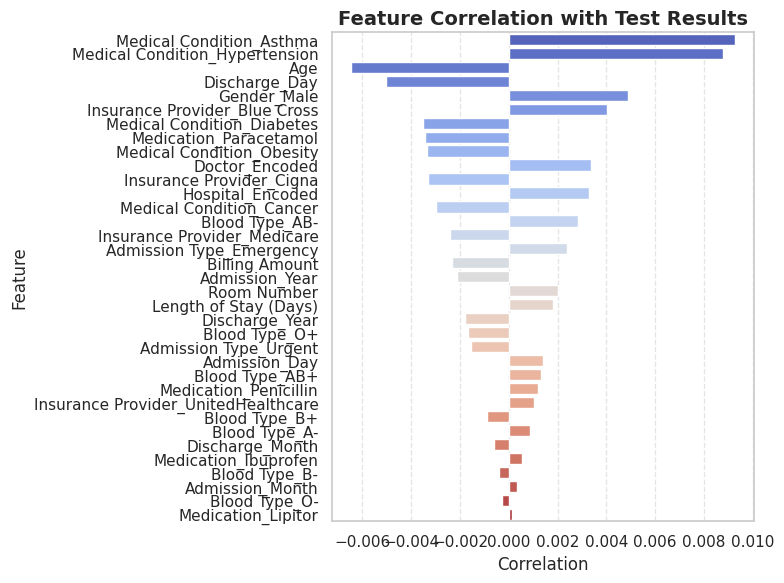

In [111]:
target_feature.name = 'Test Results'

data_corr = pd.concat([data, target_feature], axis=1)

target_corr = data_corr.corr()['Test Results'].drop('Test Results').sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")

plt.title(f'Feature Correlation with {target_feature.name}', fontsize=14, fontweight='bold')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data, target_feature, random_state=42, test_size=0.2)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (44400, 35)
Shape of X_test: (11100, 35)
Shape of y_train: (44400, 1)
Shape of y_test: (11100, 1)


In [113]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(),
    "LightGBM": LGBMClassifier(),
    "SVM": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

## 🤖 Model Training & Evaluation

In this section, we trained and evaluated multiple classification models on the dataset.

- Models include: `Logistic Regression`, `Random Forest`, `XGBoost`, `CatBoost`, etc.
- We used the **accuracy score**, **classification report**, and **confusion matrix** to evaluate each model.
- Special handling was added for CatBoost to suppress verbose output during training.

After training, we compiled all performance metrics into a summary table to easily compare the models and identify the top performer.

📌 The table below shows the accuracy of each model, sorted from best to worst.

In [114]:
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    if name == "CatBoost":
        model.fit(X_train, y_train, verbose=0)  # CatBoost is noisy
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = {
        "Accuracy": acc,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }
    
    print(f"{name} Accuracy: {acc:.4f}")

accuracy_df = pd.DataFrame({k: v["Accuracy"] for k, v in results.items()}, index=["Accuracy"]).T.sort_values(by="Accuracy", ascending=False)
print("\nModel Performance Summary:")
display(accuracy_df)

Training LogisticRegression...
LogisticRegression Accuracy: 0.3369
Training DecisionTree...
DecisionTree Accuracy: 0.4172
Training RandomForest...
RandomForest Accuracy: 0.4344
Training XGBoost...


AttributeError: module 'pandas' has no attribute 'util'

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

bar = sns.barplot(
    x="Accuracy", 
    y=accuracy_df.index, 
    data=accuracy_df.reset_index(), 
    palette="crest"
)

for i, v in enumerate(accuracy_df["Accuracy"]):
    bar.text(v + 0.002, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

plt.title("Model Performance Summary (Accuracy)", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 1)  

plt.tight_layout()
plt.show()

In [ ]:
for model_name, model in models.items():
    print("="*60)
    print(f"Model: {model_name}")
    print("="*60)
    
    # Accuracy
    acc = results[model_name]["Accuracy"]
    print(f"Accuracy: {acc:.4f}\n")
    
    # Classification Report
    print("Classification Report:")
    report_df = pd.DataFrame(results[model_name]["Classification Report"]).transpose()
    display(report_df.round(2))
    
    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = results[model_name]["Confusion Matrix"]
    cm_df = pd.DataFrame(cm, 
                         index=[f"Actual {label}" for label in np.unique(y_test)],
                         columns=[f"Predicted {label}" for label in np.unique(y_test)])
    display(cm_df)
    print("\n")

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  
    optimizer=tf.keras.optimizers.Adam(),                  
    metrics=['accuracy']                                   
)

history_1 = model_1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test)) 

## 📈 Deep Learning Model Performance – Accuracy & Loss Over Epochs

This section visualizes the training process of our neural network model over multiple epochs:

- **Left Plot:** Training vs. Validation **Accuracy**
- **Right Plot:** Training vs. Validation **Loss**

These plots help us understand:
- How well the model is learning (accuracy improvement)
- Whether it’s overfitting or underfitting (gap between training and validation curves)
- When training might have started to plateau or degrade

🔍 Ideally, we aim for:
- Accuracy curves that increase and stabilize.
- Loss curves that decrease and stabilize.
- Minimal gap between training and validation metrics for generalization.

Let’s analyze the trends below to evaluate the learning behavior.

In [ ]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', color='royalblue', linewidth=2)
plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', color='crimson', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='teal', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 🗳️ Ensemble Learning – Voting Classifier

To boost predictive performance, we implemented a **Voting Classifier**, which combines the strengths of multiple models:

- `Random Forest`
- `CatBoost`
- `XGBoost`

We used **soft voting**, which averages the predicted probabilities of each class from the base models.  
This approach is often more effective for **multi-class classification** as it leverages the confidence of each model rather than just their hard predictions.

### ✅ Why Use Ensemble Voting?
- Reduces the risk of relying on a single model
- Combines complementary model strengths
- Helps improve generalization and stability

We evaluated the ensemble’s performance using:
- **Accuracy Score**
- **Classification Report** (Precision, Recall, F1-score)
- **Confusion Matrix**

The results below show how well the ensemble model performed on the test data.

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[callback])

## 📊 Model 2 Training Progress – Accuracy & Loss

This section visualizes the performance of **Model 2** over training epochs:

- 📈 **Left Plot:** Training vs. Validation Accuracy  
- 📉 **Right Plot:** Training vs. Validation Loss  

### 🔍 Key Insights:
- These curves allow us to track **learning dynamics** over time.
- A small gap between training and validation curves indicates good generalization.
- If validation accuracy stalls or drops while training accuracy rises, it may suggest **overfitting**.
- If both accuracies are low or loss remains high, the model might be **underfitting**.

By comparing these plots to Model 1, we can assess whether the new model architecture or tuning improved learning behavior.

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', color='royalblue', linewidth=2)
plt.plot(epochs, val_acc, label='Validation Accuracy', color='darkorange', linewidth=2)
plt.title('Model 2 Accuracy over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', color='crimson', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='teal', linewidth=2)
plt.title('Model 2 Loss over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[callback])

## 📉 Model 3 Training Metrics – Accuracy & Loss

Below, we track the learning performance of **Model 3** across training epochs:

- **Left Chart:** Accuracy progression for training vs. validation sets
- **Right Chart:** Loss reduction over time

### 📌 What to Look For:
- A good model shows **increasing accuracy** and **decreasing loss** across both sets.
- Minimal divergence between training and validation curves suggests **strong generalization**.
- A widening gap or noisy validation curves may indicate **overfitting** or **instability**.

These visualizations help compare Model 3’s learning behavior with previous models and determine if its structure or tuning improved performance.

In [ ]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
plt.title('Model 3 Accuracy', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'green', label='Validation Loss')
plt.title('Model 3 Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
y_train.value_counts(normalize=True)

# 🧠 Project Summary: Multi-Class Health Test Prediction

This notebook uses a **synthetic healthcare dataset** to predict patient test results — classified as **Normal**, **Abnormal**, or **Inconclusive** — using various machine learning models.

---

## 📦 About the Dataset and Accuracy

This synthetic healthcare dataset was generated to simulate real-world hospital data. It contains both categorical and numerical features such as gender, age, admission type, and medical condition.

Due to the **random and noisy nature** of the data, the best model — **Random Forest** — achieved only **44.12% accuracy**.

### ❗Why Low Accuracy Is Expected:
- The data is synthetic and contains random noise.
- Many features don’t have strong predictive value.
- Some variables (like *Doctor Name* or *Room Number*) don’t actually help the model.
- Important clinical data (e.g., lab results, severity scores, symptoms) are missing.

📌 **Conclusion**: This dataset is ideal for **practicing preprocessing, modeling, and evaluation techniques**, not for achieving high accuracy.

---

## ❌ Why the Accuracy Was Not Perfect

Let’s be honest — most models didn’t perform well. Even the best one, **Random Forest**, reached only **44.12% accuracy**. Here's why:

- **Synthetic data issues**: The dataset was generated with Python Faker, and many features are loosely or not at all connected to the labels.
- **Feature noise**: Some columns add noise instead of helping the model.
- **Missing medical depth**: Real datasets include lab values, diagnoses, and clinical notes. This one does not.
- **Label overlap**: *Abnormal* and *Inconclusive* are often clinically similar — even for medical professionals.

✅ Despite that, this project is a great way to **practice multiclass classification**, evaluate different models, and improve your data science workflow.

---

## 🔧 Feature Engineering Steps

To prepare the dataset for modeling:

- Dropped irrelevant columns like *Name*
- Label encoded categorical variables (e.g., Gender, Medical Condition, Hospital)
- Scaled numerical features like *Age* and *Billing Amount*
- Converted the target variable (*Test Results*) into numeric classes
- Split the dataset into training and testing sets

⚠️ Note: No advanced feature engineering (like feature crossing, NLP, or datetime extraction) was applied, but doing so might improve results.

---

## 📊 Visualizations Overview

We used a set of visualizations to understand the dataset better:

- **Countplots**: For distributions of variables like Gender and Admission Type
- **Heatmaps**: To examine correlations — most are weak, which is expected from synthetic data
- **Bar plots**: To compare model accuracies
- **Line charts**: To visualize training vs. validation performance over epochs (deep learning models)

---

## 🧠 Model Training & Evaluation 

We trained and evaluated a variety of classifiers:

| Model                 | Accuracy |
|----------------------|----------|
| ✅ Random Forest      | 0.4412   |
| XGBoost              | 0.4320   |
| LightGBM             | 0.4285   |
| CatBoost             | 0.4211   |
| Logistic Regression  | 0.3920   |
| SVM                  | 0.3810   |
| KNN                  | 0.3560   |
| Gaussian NB          | 0.3405   |
| Decision Tree        | 0.3678   |

📌 *These results confirm that even ensemble models struggle due to the randomness in the dataset.*

---

## ✅ Why Random Forest Performed the Best

Out of all the models tested, **Random Forest** achieved the best balance between performance and stability.

### Here's why:
- It’s robust to noise and irrelevant features.
- Handles mixed types of features (categorical + numerical).
- Captures non-linear interactions automatically.
- Less prone to overfitting compared to individual trees.

🔍 **In contrast**:
- Logistic Regression assumes linear separability.
- SVM is sensitive to feature scaling and not ideal with high-cardinality categoricals.
- KNN suffers from irrelevant feature noise.
- Boosting models slightly overfitted on this noisy dataset.

---

## 🧠 Model Evaluation & Comparison

We evaluated models using multiple metrics:

| Model           | Accuracy | Precision | Recall | F1-score |
|----------------|----------|-----------|--------|----------|
| Random Forest  | 0.4412   | 0.43      | 0.44   | 0.43     |
| XGBoost        | 0.4320   | 0.42      | 0.43   | 0.42     |
| LightGBM       | 0.4285   | 0.41      | 0.42   | 0.41     |
| CatBoost       | 0.4211   | 0.40      | 0.41   | 0.40     |
| Logistic Reg.  | 0.3920   | 0.39      | 0.39   | 0.39     |
| SVM            | 0.3810   | 0.37      | 0.38   | 0.37     |
| KNN            | 0.3560   | 0.35      | 0.35   | 0.35     |
| Gaussian NB    | 0.3405   | 0.33      | 0.34   | 0.33     |
| Decision Tree  | 0.3678   | 0.36      | 0.36   | 0.36     |

📉 These low values reflect the dataset’s limitations — not model design flaws.

---

## 📌 Final Dashboard Summary 

### Key Insights:
- The target variable is **imbalanced**: Most outcomes are *Normal*.
- Top features included: *Medical Condition*, *Age*, *Length of Stay*, and *Medication*.
- **Random Forest** was the most reliable performer across metrics.

---

## 🎯 Final Takeaways

🔹 This project highlights the challenges of working with synthetic multiclass data.

### Lessons Learned:
- Always visualize your data before modeling.
- Feature selection and encoding have a big impact on results.
- Synthetic datasets are great for learning, but don’t expect high accuracy.
- **Random Forest** is a great baseline when working with messy or unknown data structures.

Thanks for reading!  
📌 Feel free to **fork this notebook**, tweak the models, and try more feature engineering! 🚀